## Do demographic characteristics and chronic diseases effect number of comorbidities?

### Relationship between comorbidities (using the dichotomous data) and the descriptive variables (gender, age, urban/rural, poverty rate; race – Hispanic/ non-Hispanic; education; employment rate; household income)

%’s, provide cross tabs and calculate one-way ANOVA , reporting significance

Further analysis: Logistic regression or other modeling strategies

Proxy data from ACS at the county level 



In [1]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [44]:
med = pd.read_csv('../../data/claims.csv')
reshaped_med = pd.read_csv('../../data/reshaped_med.csv')
reshaped_med.head()

D:\Users\vhsu\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,member_id,year,age,gender,postal_code,county,urban_rural,binary_asthma,binary_bp,binary_cancer,...,claims_copd,claims_diabetes,claims_kidney,claims_mental_disorder,claims_musculoskeletal,claims_obesity,flag_comorbidity,flag_nonused,total_claims,total_conditions
0,71002LEM4JV1PJFM4,2017,34,F,98030,KING,urban,0,0,1,...,0,0,0,0,0,0,0,0,3,1
1,710087KT90EY0DZUV,2016,46,F,98335,PIERCE,urban,0,0,0,...,0,0,0,0,0,2,0,0,3,1
2,710087KT90EY0DZUV,2017,46,F,98335,PIERCE,urban,0,0,0,...,0,0,0,0,0,8,0,0,10,1
3,710087KT90EY0DZUV,2018,47,F,98335,PIERCE,urban,1,0,0,...,1,0,0,0,0,15,1,0,24,3
4,71008ADZ2VBBDM14C,2016,53,F,98032,KING,urban,0,0,0,...,0,3,0,0,0,0,0,0,5,1


In [45]:
def code_chronic_disease (group):
    df = pd.DataFrame()
    df['member_id'] = group.head(1)['member_id']
    df['gender'] = group.head(1)['gender']
    df['age'] = group['age'].max()
    df['urban_rural'] = group.head(1)['urban_rural']
    if any(group['flag_comorbidity'] == 1):
        df['chronic_disease'] = 2
    elif any(group['total_conditions'] == 1):
        df['chronic_disease'] = 1
    else:
        df['chronic_disease'] = 0
    return df

In [46]:
comorbid = reshaped_med.groupby('member_id', as_index=False).apply(code_chronic_disease)

In [47]:
comorbid.head()

,,member_id,gender,age,urban_rural,chronic_disease
0,0,71002LEM4JV1PJFM4,F,34,urban,1
1,1,710087KT90EY0DZUV,F,47,urban,2
2,4,71008ADZ2VBBDM14C,F,55,urban,2
3,7,7100UKNUMFS22SCRI,M,47,urban,1
4,9,7100UNBYH5SYEX19X,F,64,urban,2


## Percentages

### Gender %'s

In [48]:
gender_comorbid = comorbid.loc[comorbid['chronic_disease'] == 2].groupby('gender').size()
gender = comorbid.groupby('gender').size()

In [49]:
gender_pct = gender_comorbid/gender
gender_pct

gender
F    0.466364
M    0.450134
dtype: float64

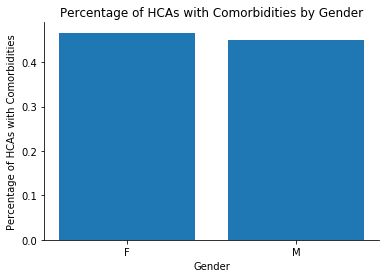

In [50]:
ax = plt.subplot()
ax.bar(gender_pct.index, gender_pct)
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage of HCAs with Comorbidities')
ax.set_title('Percentage of HCAs with Comorbidities by Gender')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Age %'s

In [51]:
def age_buckets(row):
    age_bucket = ''
    if (row['age'] >= 18 and row['age'] <=29):
        age_bucket = '18-29'
    elif (row['age'] >= 30 and row['age'] <= 39):
        age_bucket = '30-39'
    elif (row['age'] >= 40 and row['age'] <= 49):
        age_bucket = '40-49'
    elif (row['age'] >= 50 and row['age'] <= 59):
        age_bucket = '50-59'
    elif (row['age'] >= 60 and row['age'] <= 69):
        age_bucket = '60-69'
    elif (row['age'] >= 70):
        age_bucket = '70+'
    return age_bucket

In [52]:
comorbid['age_bucket'] = comorbid.apply(age_buckets, axis=1)

In [53]:
comorbid.head()

,,member_id,gender,age,urban_rural,chronic_disease,age_bucket
0,0,71002LEM4JV1PJFM4,F,34,urban,1,30-39
1,1,710087KT90EY0DZUV,F,47,urban,2,40-49
2,4,71008ADZ2VBBDM14C,F,55,urban,2,50-59
3,7,7100UKNUMFS22SCRI,M,47,urban,1,40-49
4,9,7100UNBYH5SYEX19X,F,64,urban,2,60-69


In [54]:
age_comorbid = comorbid.loc[comorbid['chronic_disease'] == 2].groupby('age_bucket').size()
age = comorbid.groupby('age_bucket').size()

In [55]:
age_pct = age_comorbid/age

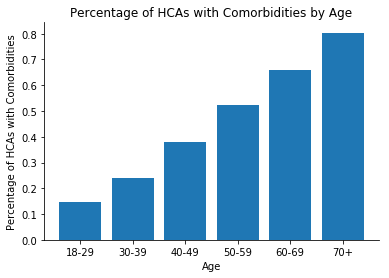

In [56]:
ax = plt.subplot()
ax.bar(age_pct.index, age_pct)
ax.set_xlabel('Age')
ax.set_ylabel('Percentage of HCAs with Comorbidities')
ax.set_title('Percentage of HCAs with Comorbidities by Age')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Urban/Rural %'s

In [57]:
urban_rural_comorbid = comorbid.loc[comorbid['chronic_disease'] == 2].groupby('urban_rural').size()
urban_rural = comorbid.groupby('urban_rural').size()

In [58]:
urban_rural_pct = urban_rural_comorbid/urban_rural
urban_rural_pct

urban_rural
rural    0.486056
urban    0.462360
dtype: float64

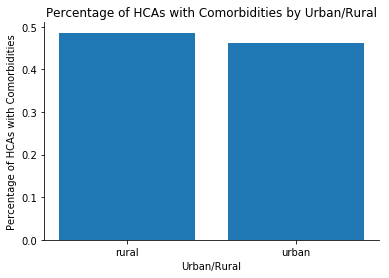

In [59]:
ax = plt.subplot()
ax.bar(urban_rural_pct.index, urban_rural_pct)
ax.set_xlabel('Urban/Rural')
ax.set_ylabel('Percentage of HCAs with Comorbidities')
ax.set_title('Percentage of HCAs with Comorbidities by Urban/Rural')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Crosstabs

In [18]:
gender_crosstab = pd.crosstab(comorbid['chronic_disease'], comorbid['gender'])
gender_crosstab

gender,F,M
chronic_disease,,
0,5003,1087
1,4270,760
2,8104,1512


In [19]:
gender_crosstab_pct = pd.crosstab(comorbid['chronic_disease'], comorbid['gender']).apply(lambda r: r/r.sum(), axis=1)
gender_crosstab_pct

gender,F,M
chronic_disease,,
0,0.821511,0.178489
1,0.848907,0.151093
2,0.842762,0.157238


In [20]:
age_crosstab = pd.crosstab(comorbid['chronic_disease'], comorbid['age'])
age_crosstab.head()

age,0,18,19,20,21,22,23,24,25,26,...,82,83,84,85,86,87,88,89,90,93
chronic_disease,,,,,,,,,,,,,,,,,,,,,
0,1,2,32,65,80,92,105,114,122,153,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5,18,29,41,46,50,58,72,...,2,1,1,2,1,0,0,0,0,0
2,0,0,2,5,7,13,22,29,26,44,...,9,5,4,7,2,1,3,4,1,1


In [21]:
age_crosstab_pct = pd.crosstab(comorbid['chronic_disease'], comorbid['age']).apply(lambda r: r/r.sum(), axis=1)
age_crosstab_pct

age,0,18,19,20,21,22,23,24,25,26,...,82,83,84,85,86,87,88,89,90,93
chronic_disease,,,,,,,,,,,,,,,,,,,,,
0,0.000164,0.000328,0.005255,0.010673,0.013136,0.015107,0.017241,0.018719,0.020033,0.025123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000994,0.003579,0.005765,0.008151,0.009145,0.009940,0.011531,0.014314,...,0.000398,0.000199,0.000199,0.000398,0.000199,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000208,0.000520,0.000728,0.001352,0.002288,0.003016,0.002704,0.004576,...,0.000936,0.000520,0.000416,0.000728,0.000208,0.000104,0.000312,0.000416,0.000104,0.000104


In [22]:
urban_rural_crosstab = pd.crosstab(comorbid['chronic_disease'], comorbid['urban_rural'])
urban_rural_crosstab

urban_rural,rural,urban
chronic_disease,,
0,380,5706
1,265,4764
2,610,9004


In [23]:
urban_rural_crosstab_pct = pd.crosstab(comorbid['chronic_disease'], comorbid['urban_rural']).apply(lambda r: r/r.sum(), axis=1)
urban_rural_crosstab_pct

urban_rural,rural,urban
chronic_disease,,
0,0.062438,0.937562
1,0.052694,0.947306
2,0.063449,0.936551


## ANOVA

In [34]:
gender_groups = [col for col_name, col in comorbid.groupby('gender')['chronic_disease']]
F_gender, p_gender = stats.f_oneway(*gender_groups)
print('F-value: ', F_gender)
print('p-value: ', p_gender)

F-value:  10.423446526081847
p-value:  0.0012461901575031476


In [25]:
age_groups = [col for col_name, col in comorbid.groupby('age')['chronic_disease']]
F_age, p_age = stats.f_oneway(*age_groups)
print('F-value: ', F_age)
print('p-value: ', p_age)

F-value:  49.817108434567906
p-value:  0.0


In [33]:
urban_rural_groups = [col for col_name, col in comorbid.groupby('urban_rural')['chronic_disease']]
F_urban_rural, p_urban_rural = stats.f_oneway(*urban_rural_groups)
print('F-value: ', F_urban_rural)
print('p-value: ', p_urban_rural)

F-value:  0.31328262748990227
p-value:  0.5756788334703844


## Logistic Regression

In [27]:
def code_comorbid (group):
    df = pd.DataFrame()
    df['gender'] = group.head(1)['gender']
    df['age'] = group['age'].max()
    df['urban_rural'] = group.head(1)['urban_rural']
    df['binary_asthma'] = group['binary_asthma'].max()
    df['binary_bp'] = group['binary_bp'].max()
    df['binary_cancer'] = group['binary_cancer'].max()
    df['binary_cardiovascular'] = group['binary_cardiovascular'].max()
    df['binary_cholesterol'] = group['binary_cholesterol'].max()
    df['binary_copd'] = group['binary_copd'].max()
    df['binary_diabetes'] = group['binary_diabetes'].max()
    df['binary_kidney'] = group['binary_kidney'].max()
    df['binary_mental_disorder'] = group['binary_mental_disorder'].max()
    df['binary_musculoskeletal'] = group['binary_musculoskeletal'].max()
    df['binary_obesity'] = group['binary_obesity'].max()    
    df['flag_comorbidity'] = group['flag_comorbidity'].max()
    return df

In [35]:
sample = reshaped_med.dropna()
sample = sample.loc[sample['total_conditions'] >= 1]
sample = sample.groupby('member_id', as_index=False).apply(code_comorbid)
gender = {'M': 1,'F': 0} 
urban_rural = {'urban': 1, 'rural':0}
sample['gender'] = [gender[item] for item in sample['gender']] 
sample['urban_rural'] = [urban_rural[item] for item in sample['urban_rural']]
sample.head()

,,gender,age,urban_rural,binary_asthma,binary_bp,binary_cancer,binary_cardiovascular,binary_cholesterol,binary_copd,binary_diabetes,binary_kidney,binary_mental_disorder,binary_musculoskeletal,binary_obesity,flag_comorbidity
0,0,0,34,1,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,47,1,1,0,0,1,0,1,0,0,0,0,1,1
2,4,0,55,1,0,0,0,0,1,0,1,0,0,0,1,1
3,8,1,47,1,0,0,0,0,0,1,0,0,0,0,0,0
4,9,0,64,1,0,0,0,0,1,0,0,0,0,1,0,1


In [36]:
def binary_age_buckets(row):
    if (row['age'] >= 18 and row['age'] <=29):
        age_bucket = 0
    elif (row['age'] >= 30 and row['age'] <= 39):
        age_bucket = 1
    elif (row['age'] >= 40 and row['age'] <= 49):
        age_bucket = 2
    elif (row['age'] >= 50 and row['age'] <= 59):
        age_bucket = 3
    elif (row['age'] >= 60 and row['age'] <= 69):
        age_bucket = 4
    elif (row['age'] >= 70):
        age_bucket = 5
    return age_bucket

In [37]:
mental_disorder_ref = sample['binary_mental_disorder']
sample = sample.loc[:, sample.columns != 'binary_mental_disorder']
sample['age'] = sample.apply(binary_age_buckets, axis=1)
age_ref = sample.loc[sample['age'] == 0]
sample = sample.loc[sample['age'] != 0]
sample.head()

,,gender,age,urban_rural,binary_asthma,binary_bp,binary_cancer,binary_cardiovascular,binary_cholesterol,binary_copd,binary_diabetes,binary_kidney,binary_musculoskeletal,binary_obesity,flag_comorbidity
0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
1,1,0,2,1,1,0,0,1,0,1,0,0,0,1,1
2,4,0,3,1,0,0,0,0,1,0,1,0,0,1,1
3,8,1,2,1,0,0,0,0,0,1,0,0,0,0,0
4,9,0,4,1,0,0,0,0,1,0,0,0,1,0,1


In [38]:
independent = sample.loc[:, sample.columns != 'flag_comorbidity']
dependent = sample['flag_comorbidity']

In [39]:
reg = LogisticRegression().fit(independent, dependent)

D:\Users\vhsu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
age_ref_independent = age_ref.loc[:, age_ref.columns != 'flag_comorbidity']
age_ref_dependent = age_ref['flag_comorbidity']
reg.predict_proba(age_ref_independent)

array([[1.97553127e-01, 8.02446873e-01],
       [9.19446512e-06, 9.99990806e-01],
       [1.75854798e-01, 8.24145202e-01],
       ...,
       [9.75708351e-01, 2.42916485e-02],
       [9.61569197e-01, 3.84308031e-02],
       [2.06896854e-03, 9.97931031e-01]])

In [41]:
reg.score(age_ref_independent, age_ref_dependent)

0.9423728813559322